In [15]:
import os, maboss
from tabularqual.convert_sbml_to_spreadsheet import convert_sbml_to_spreadsheet
from tabularqual.convert_spreadsheet_to_sbml import convert_spreadsheet_to_sbml
from tabularqual.sbml_reader import read_sbml
import matplotlib.pyplot as plt
import numpy as np

In [2]:
for model in os.listdir("maboss"):
    print(model)
    sbml_spreadsheet_errors = []
    spreadsheet_sbml_errors = []
    if model.endswith(".sbml") and not model.endswith("_new.sbml"):
        sbml_file = os.path.join("maboss", model)
        spreadsheet_file = ".".join(sbml_file.split(".")[:-1]) + ".xlsx"
        new_sbml_file = ".".join(sbml_file.split(".")[:-1]) + "_new.sbml"
        try:
            convert_sbml_to_spreadsheet(
                sbml_file,
                spreadsheet_file,
                template_path=None,  # No template to skip README/Appendix
                rule_format="operators",
                validate=False, # no validation
                print_messages=False, # no messages,
                use_name=False
            )
        except:
            sbml_spreadsheet_errors.append(model)

        try:
            convert_spreadsheet_to_sbml(
                spreadsheet_file,
                new_sbml_file,
                interactions_anno=False, # no existing interaction annotations
                transitions_anno=True,
                validate=False, # no validation
                print_messages=False, # no messages,
                use_name=False
            )
        except:
            spreadsheet_sbml_errors.append(model)


SeaUrchin_model_ginsim_new.sbml
RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018.xlsx
Montagud2021_Prostate_Cancer.xlsx
Corral_ThIL17diff_15jan2021_new.sbml
Cacace_TdevModel_2nov2020.xlsx
cell_fate_new.sbml
cell_fate.sbml
BIOMD0000000562_url.xlsx
5025.xlsx
SeaUrchin_model_ginsim.xlsx
Cohen_new.sbml
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018_new.sbml
Cacace_TdevModel_2nov2020_new.sbml
Tumour Cell Invasion and Migration (SBML).xlsx
RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018.sbml
MODEL1506260000_url.sbml
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018.sbml
Cohen.sbml
5025.sbml
SeaUrchin_model_ginsim.sbml
Cohen.xlsx
BIOMD0000000562_url.sbml
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018.xlsx
MODEL1506260000_url.xlsx
2176.xlsx
Corral_ThIL17diff_15jan2021.sbml
RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018_new.sbml
Cacace_TdevModel_2nov2020.sbml
Montagud2021_Prostate_Cancer.sbml
Corral_ThIL17diff_15jan2021.xlsx
5025

In [3]:
sbml_spreadsheet_errors

[]

In [4]:
spreadsheet_sbml_errors

[]

In [5]:
cant_load = []
cant_simulate = []
results = {}
for model in os.listdir("maboss"):
    if model.endswith(".sbml") and not model.endswith("_new.sbml"):
        sbml_file = os.path.join("maboss", model)
        spreadsheet_file = ".".join(sbml_file.split(".")[:-1]) + ".xlsx"
        new_sbml_file = ".".join(sbml_file.split(".")[:-1]) + "_new.sbml"
        if os.path.exists(new_sbml_file):
            print(model)
            m = maboss.loadSBML(sbml_file)
            
            try:
                m_new = maboss.loadSBML(new_sbml_file)
            except:
                cant_load.append(model)
                continue
            
            m.update_parameters(max_time=100, time_tick=10, sample_count=100000, thread_count=16)
            for node in m.network:
                m.network.set_istate(node, [0.5, 0.5])
            r = m.run(cmaboss=True)
            
            try:
                m_new.update_parameters(max_time=100, time_tick=10, sample_count=100000, thread_count=16)
                for node in m_new.network:
                    m_new.network.set_istate(node, [0.5, 0.5])
                r_new = m_new.run(cmaboss=True)
            except:
                cant_simulate.append(model)
                continue

            # fig, ax = plt.subplots(1,2)
            # r.plot_piechart(axes=ax[0])
            # r_new.plot_piechart(axes=ax[1])
            results[model] = (r.get_nodes_probtraj(), r_new.get_nodes_probtraj())

cell_fate.sbml
RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018.sbml
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018.sbml
Cohen.sbml
5025.sbml
SeaUrchin_model_ginsim.sbml
Corral_ThIL17diff_15jan2021.sbml
Cacace_TdevModel_2nov2020.sbml
Montagud2021_Prostate_Cancer.sbml
2176.sbml
Tumour Cell Invasion and Migration (SBML).sbml


RodriguezJorge_TCR_Signalling_BooleanModel_17Jul2018.sbml
RodriguezJorge_Merged_TCR_TLR5_Signalling_BooleanModel_15Jul2018.sbml
SeaUrchin_model_ginsim.sbml
Corral_ThIL17diff_15jan2021.sbml
Cacace_TdevModel_2nov2020.sbml
Montagud2021_Prostate_Cancer.sbml


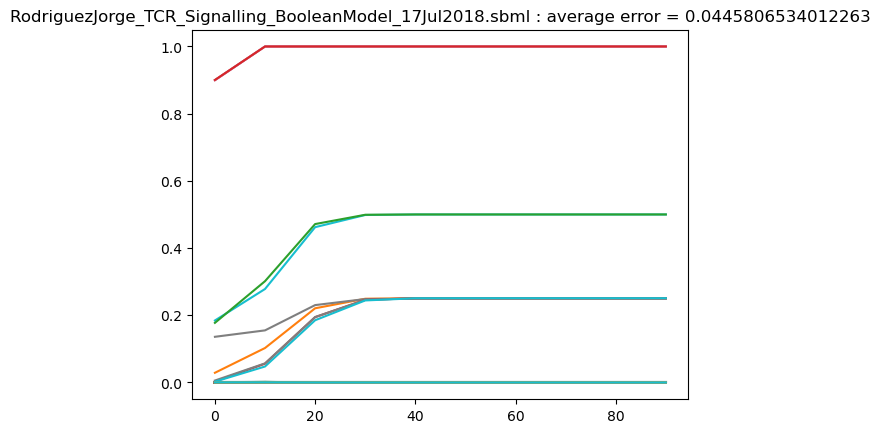

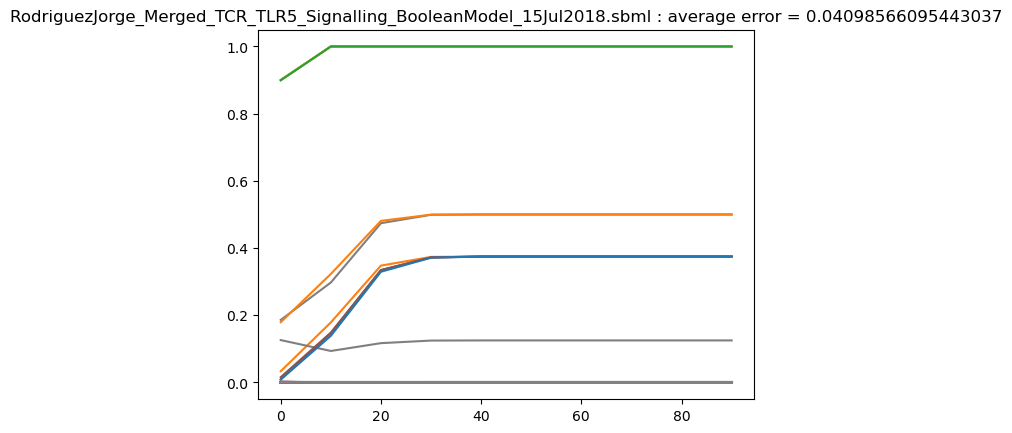

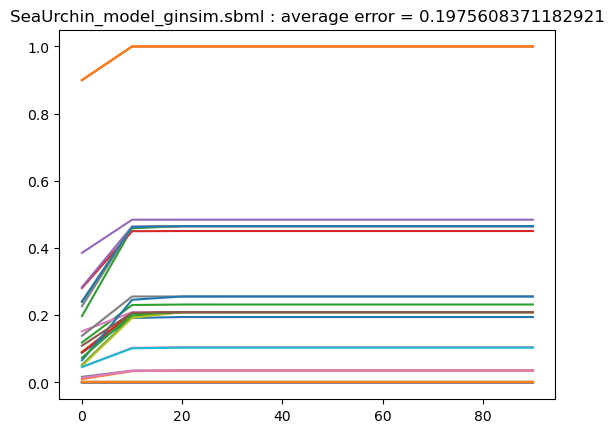

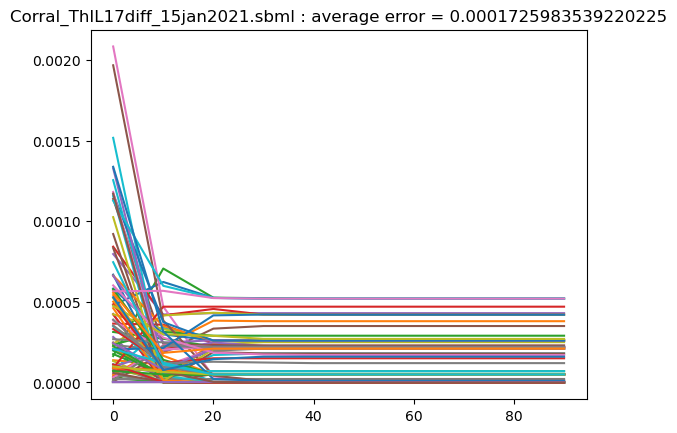

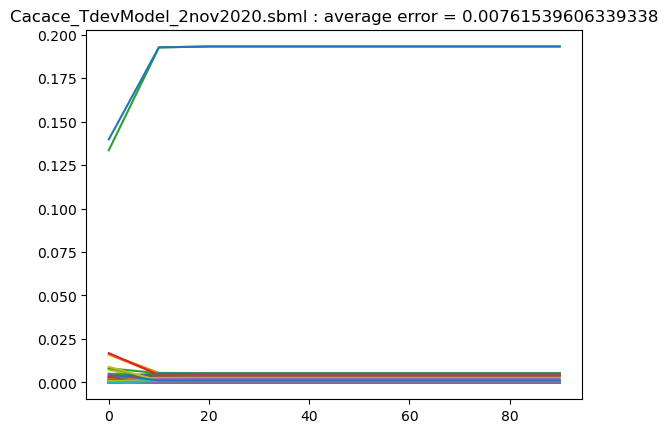

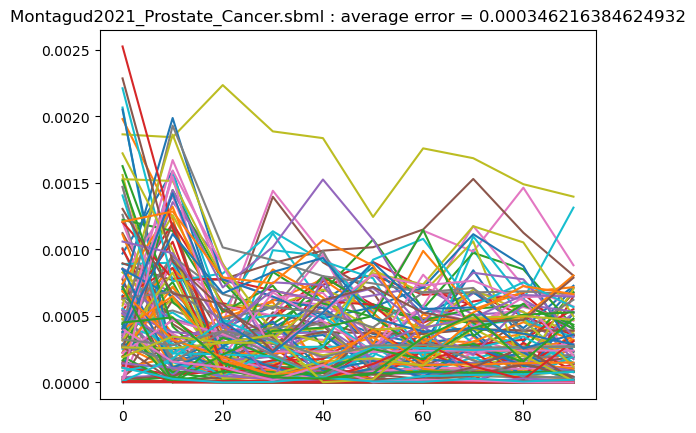

In [23]:
for model, (result, new_result) in results.items():
    average_diff = np.mean(abs(result - new_result))   
    if average_diff > 0:
        plt.figure()
        plt.title(f"{model} : average error = {average_diff}")
        plt.plot(abs(result-new_result))
        